In [1]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\doubl\anaconda3\lib\site-packages\qiskit\visualization\matplotlib.py:317: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  self._get_layer_widths()


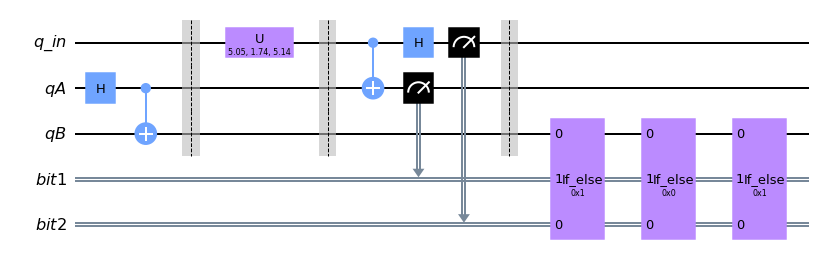

In [2]:
# define the three qubits at play as three instances of class QuantumRegister
in_qubit = QuantumRegister(size=1, name="q_in")
ebitA = QuantumRegister(size=1, name="qA")
ebitB = QuantumRegister(size=1, name="qB")

#now the two bits which will store the result of Alice's Bell measurement 
bit1 = ClassicalRegister(1, "bit1")
bit2 = ClassicalRegister(1, "bit2")

#put the qubits together in a circuit
tele_circuit = QuantumCircuit(in_qubit, ebitA, ebitB, bit1,bit2)

# Alice and Bob prepare their Bell state
tele_circuit.h(ebitA)
tele_circuit.cx(ebitA,ebitB)
tele_circuit.barrier()

# rotate the in_qubit randomly
random_gate = UGate(
    random.random() * 2 * pi,
    random.random() * 2 * pi,
    random.random() * 2 * pi,
)
in_qubit
tele_circuit.append(random_gate, in_qubit)
tele_circuit.barrier()

# Alice's Bell measurement
tele_circuit.cx(in_qubit,ebitA)
tele_circuit.h(in_qubit)
tele_circuit.measure(ebitA,bit1)
tele_circuit.measure(in_qubit,bit2)
tele_circuit.barrier()

#Bob's local operations conditioned on the two bits
# nothing if bit1 = bit2 = 0...
with tele_circuit.if_test((bit1, 1)):
    with tele_circuit.if_test((bit2, 0)):
        tele_circuit.x(ebitB)
with tele_circuit.if_test((bit1, 0)):
    with tele_circuit.if_test((bit2, 1)):
        tele_circuit.z(ebitB)
with tele_circuit.if_test((bit1, 1)):
    with tele_circuit.if_test((bit2, 1)):
        tele_circuit.y(ebitB)

tele_circuit.draw(output='mpl')